Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
import pandas as pd


# DataFrames were imported and cleaned by dropping irrelevant columns.
df = pd.read_csv("../data/vancouver_citibike_stations.csv")
df_drop = df.drop(columns=['Unnamed: 0', 'latitude', 'longitude'])

df1 = pd.read_csv("../data/vancouver_yelp_locations.csv")
df1_drop = df1.drop(columns=['Unnamed: 0', 'yelp_categories', 'yelp_city', 'location.zip_code', 
                             'location.country','yelp_location_province', 'yelp_address', 'latitude', 'longitude'])

#Saved the merged dataframe as a .csv file for statistical modeling.
combined_df = pd.merge(df_drop, df1_drop, on=['citibike_id'], how='inner')

combined_df.head(5)

#Save As: .csv file - combined_df.to_csv("../data/vancouver_citibikes_and_yelp_locations.csv")

,empty_slots,free_bikes,citibike_id,citibike_station,yelp_id,yelp_name,yelp_review_count,yelp_rating
0,19,17,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,FPP0VvrPrV8RrF6Yye31ig,Chef Hung Taiwanese Beef Noodle,67,2.7
1,3,13,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,uW6NtwN8hxrOLMyPi9IVcA,Neptune Chinese Kitchen,37,2.9
2,25,1,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,oSRxJSXssqOAAVlF1DS0Zg,Doughgirls,63,4.4
3,14,2,66f873d641d448bd1572ab086665a458,12th & Yukon (City Hall),oaBBSXNwlk7hOK4XIiw00A,Burgoo Bistro,135,3.9
4,7,8,485d4d24c803cfde829ab89699fed833,8th & Ash,estK0IAUPgS0bftyYHTXNA,Blenz Coffee,29,3.3


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

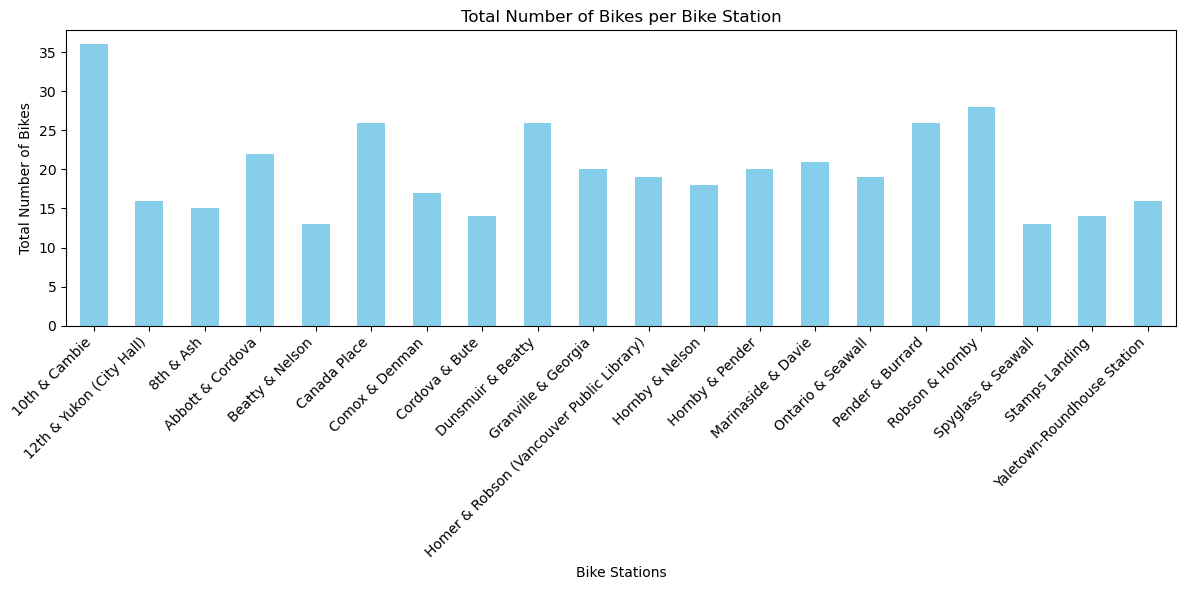

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 


#Summed 'free_bikes' and 'empty_slots' to get 'total_bikes' at a bike station.
combined_df['total_bikes'] = combined_df['free_bikes'] + combined_df['empty_slots']


bikes_per_station = combined_df_drop_col.groupby('citibike_station')['total_bikes'].sum()

# Plotting
plt.figure(figsize=(12, 6))
bikes_per_station.plot(kind='bar', color='skyblue')
plt.xlabel('Bike Stations')
plt.ylabel('Total Number of Bikes')
plt.title('Total Number of Bikes per Bike Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Bar Graph of Total Number of Bikes per Station

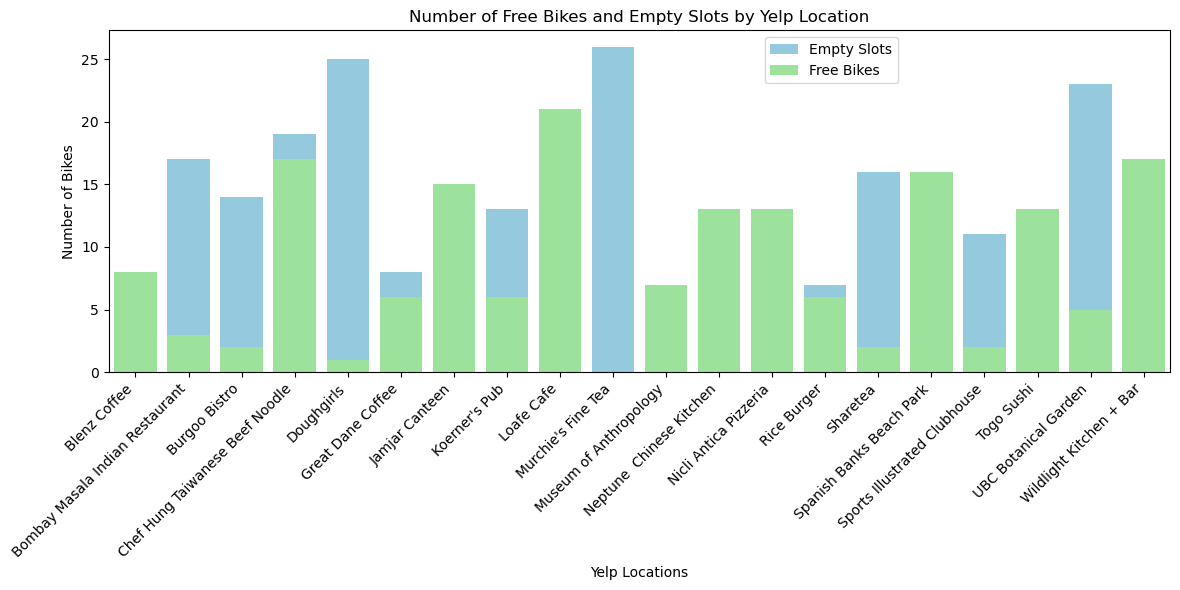

In [11]:
import pandas as pd
import seaborn as sns


# Grouped by Yelp location and get the number of 'empty_slots' and 'free_bikes'.
yelp_location_stats = combined_df.groupby('yelp_name')[['empty_slots', 'free_bikes']].sum()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=yelp_location_stats, x=yelp_location_stats.index, y='empty_slots', color='skyblue', label='Empty Slots')
sns.barplot(data=yelp_location_stats, x=yelp_location_stats.index, y='free_bikes', color='lightgreen', label='Free Bikes')
plt.xlabel('Yelp Locations')
plt.ylabel('Number of Bikes')
plt.title('Number of Free Bikes and Empty Slots by Yelp Location')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(0.75, 1))
plt.tight_layout()
plt.show()

#Overlay Bar Plot of Free Bikes versus Empty Slots for each Yelp Location

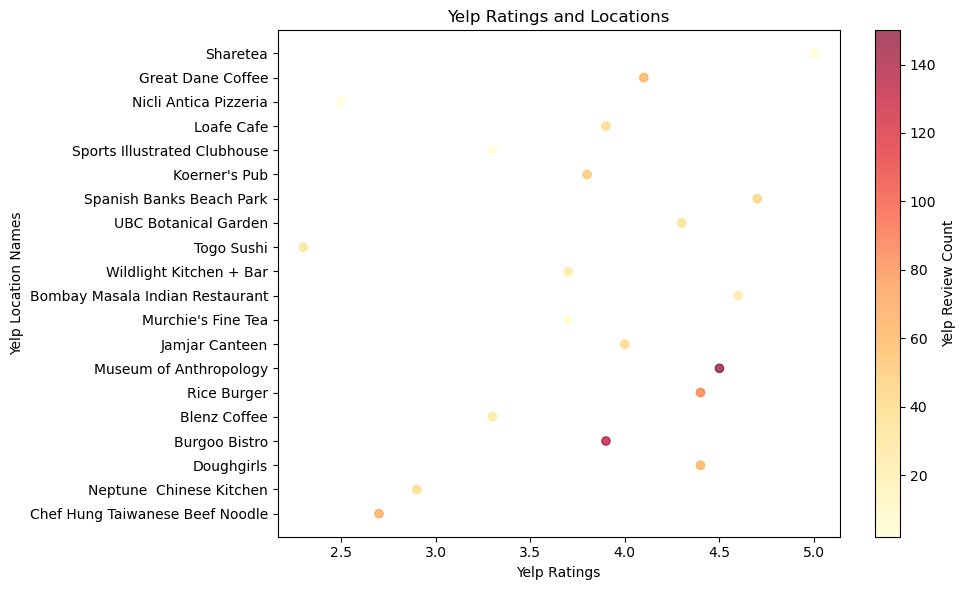

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#Plot of Yelp Ratings by Locations with Measure of Yelp Review Counts.
plt.figure(figsize=(10, 6))
#https://matplotlib.org/stable/users/explain/colors/colormaps.html for colormaps.
plt.scatter(df1['yelp_rating'], df1['yelp_name'], c=df1['yelp_review_count'], cmap='YlOrRd', alpha=0.7)
plt.colorbar(label='Yelp Review Count')
plt.xlabel('Yelp Ratings')
plt.ylabel('Yelp Location Names')
plt.title('Yelp Ratings and Locations')
plt.tight_layout()
plt.show()

#Scatter Plot of Yelp Ratings and Yelp Locations with Review Count

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [371]:
import sqlite3
from sqlite3 import Error
import pandas as pd

df = pd.read_csv("../data/vancouver_citibike_stations.csv")
df1 = pd.read_csv("../data/vancouver_yelp_locations.csv")

#Connect to the SQLite Database in Python:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [372]:
#Return a Connection:
connection = create_connection("vancouver_citibikes_and_yelp.sqlite")

Connection to SQLite DB successful


In [373]:
#Create Tables Function
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [374]:
#Create the Table for CitiBikes in Vancouver:
create_vancouver_citibike_table = """
CREATE TABLE IF NOT EXISTS vancouver_citibike_stations (
    empty_slots INTEGER,
    free_bikes INTEGER,
    citibike_id TEXT PRIMARY KEY NOT NULL,
    citibike_station TEXT
);
"""

In [375]:
#Create Table Query for CitiBikes:
execute_query(connection, create_vancouver_citibike_table)

Query executed successfully


In [376]:
#Create the Table for Yelp Locations in Vancouver:
create_vancouver_yelp_table = """
CREATE TABLE IF NOT EXISTS vancouver_yelp_locations (
    yelp_id TEXT,
    yelp_name TEXT,
    yelp_review_count INTEGER,
    yelp_rating FLOAT,
    citibike_id TEXT,
    FOREIGN KEY (citibike_id) REFERENCES vancouver_citibike_stations (citibike_id)
);
"""

In [377]:
#Create Table Query for Yelp Locations:
execute_query(connection, create_vancouver_yelp_table)

Query executed successfully


In [378]:
#Import CitiBike to SQLite:
df_drop_col.to_sql('vancouver_citibike_stations', connection, if_exists = 'replace', index = False)

251

In [379]:
#Import Yelp to SQLite:
df1_drop_col.to_sql('vancouver_yelp_locations', connection, if_exists = 'replace', index = False)

20

In [380]:
#Close Connection:
connection.close()

Look at the data before and after the join to validate your data.

In [381]:
#Create Connection to SQLite:
connection = create_connection("../data/vancouver_citibikes_and_yelp.sqlite")

Connection to SQLite DB successful


In [382]:
#Select Records Function: 
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [383]:
#Select All from CitiBike Table limited to 5 rows:
select_citibike = "SELECT * from vancouver_citibike_stations limit 5"
vancouver_citibike_stations = execute_read_query(connection, select_citibike)

for citibike in vancouver_citibike_stations:
    print(citibike)

(19, 17, '7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie')
(3, 13, '32603a87cfca71d0f7dfa3513bad69d5', 'Yaletown-Roundhouse Station')
(25, 1, '6d42fa40360f9a6b2bf641c7b8bb2862', 'Dunsmuir & Beatty')
(14, 2, '66f873d641d448bd1572ab086665a458', '12th & Yukon (City Hall)')
(7, 8, '485d4d24c803cfde829ab89699fed833', '8th & Ash')


In [384]:
#Select All from Yelp Table limited to 5 rows:
select_vancouver_yelp_locations = "SELECT * from vancouver_yelp_locations limit 5"
vancouver_yelp_locations = execute_read_query(connection, select_vancouver_yelp_locations)

for vancouver_yelp_location in vancouver_yelp_locations:
    print(vancouver_yelp_location)

('FPP0VvrPrV8RrF6Yye31ig', 'Chef Hung Taiwanese Beef Noodle', 67, 2.7, '7a19c49f486d7c0c02b3685d7b240448')
('uW6NtwN8hxrOLMyPi9IVcA', 'Neptune  Chinese Kitchen', 37, 2.9, '32603a87cfca71d0f7dfa3513bad69d5')
('oSRxJSXssqOAAVlF1DS0Zg', 'Doughgirls', 63, 4.4, '6d42fa40360f9a6b2bf641c7b8bb2862')
('oaBBSXNwlk7hOK4XIiw00A', 'Burgoo Bistro', 135, 3.9, '66f873d641d448bd1572ab086665a458')
('estK0IAUPgS0bftyYHTXNA', 'Blenz Coffee', 29, 3.3, '485d4d24c803cfde829ab89699fed833')


In [391]:
#Apply Join Function:
combine_tables = """
SELECT *
FROM
    vancouver_citibike_stations
INNER JOIN vancouver_yelp_locations
    ON vancouver_citibike_stations.citibike_id = vancouver_yelp_locations.citibike_id
LIMIT 5
"""

call_join = execute_read_query(connection, combine_tables)

for join in call_join:
    print(join)

(19, 17, '7a19c49f486d7c0c02b3685d7b240448', '10th & Cambie', 'FPP0VvrPrV8RrF6Yye31ig', 'Chef Hung Taiwanese Beef Noodle', 67, 2.7, '7a19c49f486d7c0c02b3685d7b240448')
(3, 13, '32603a87cfca71d0f7dfa3513bad69d5', 'Yaletown-Roundhouse Station', 'uW6NtwN8hxrOLMyPi9IVcA', 'Neptune  Chinese Kitchen', 37, 2.9, '32603a87cfca71d0f7dfa3513bad69d5')
(25, 1, '6d42fa40360f9a6b2bf641c7b8bb2862', 'Dunsmuir & Beatty', 'oSRxJSXssqOAAVlF1DS0Zg', 'Doughgirls', 63, 4.4, '6d42fa40360f9a6b2bf641c7b8bb2862')
(14, 2, '66f873d641d448bd1572ab086665a458', '12th & Yukon (City Hall)', 'oaBBSXNwlk7hOK4XIiw00A', 'Burgoo Bistro', 135, 3.9, '66f873d641d448bd1572ab086665a458')
(7, 8, '485d4d24c803cfde829ab89699fed833', '8th & Ash', 'estK0IAUPgS0bftyYHTXNA', 'Blenz Coffee', 29, 3.3, '485d4d24c803cfde829ab89699fed833')


In [ ]:
]